<>:23: SyntaxWarning: invalid escape sequence '\P'
<>:23: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16484\3051333765.py:23: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Pythonme\data.csv')


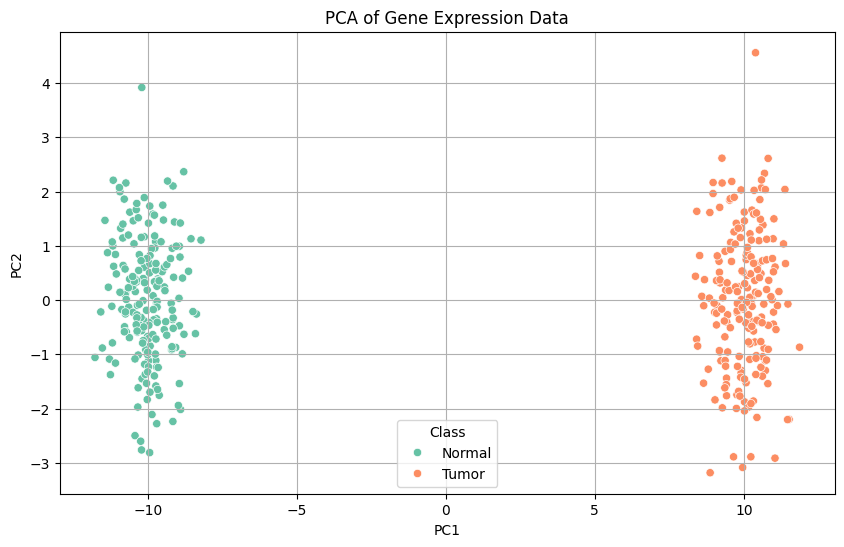

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        60
       Tumor       1.00      1.00      1.00        60

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



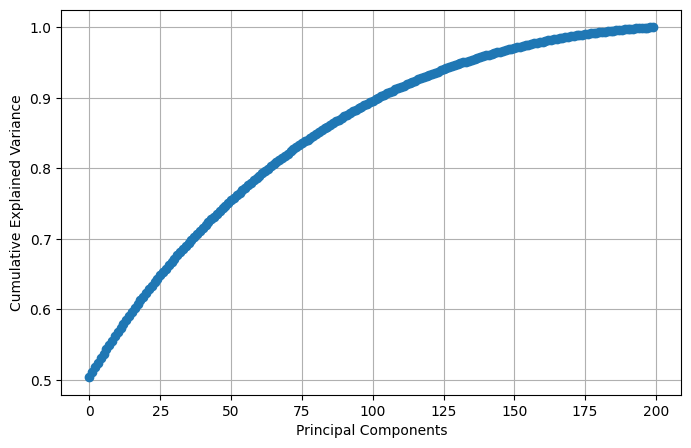

In [ ]:
#Cancer detection from gene expression data using PCA and random forest algorithm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Choose one of these dataset sources:

# Option 1: UCI method
##from ucimlrepo import fetch_ucirepo
#data = fetch_ucirepo(id=401)
#X = data.data.features
#y = data.data.targets

 #Option 2: Kaggle CSV (if downloaded manually)
df = pd.read_csv('D:\Pythonme\data.csv')
X = df.drop('Class', axis=1)
y = df['Class']

# 1. Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA reduction to 2 components (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Visualize
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set2')
plt.title('PCA of Gene Expression Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# 4. Split and model
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Scree plot for variance ratio
pca_full = PCA()
pca_full.fit(X_scaled)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [3]:
df.head()

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_192,Gene_193,Gene_194,Gene_195,Gene_196,Gene_197,Gene_198,Gene_199,Gene_200,Class
0,4.188072,6.165235,4.928534,5.778042,4.412897,5.657034,7.495655,3.891145,4.839208,4.270674,...,4.026129,3.727219,3.595632,5.499760,4.613147,-0.217254,4.597605,4.223132,6.339238,Normal
1,4.155112,8.808887,7.095190,4.415134,6.724435,5.787818,5.350199,6.203978,5.081106,5.360527,...,5.318984,6.301774,3.595229,3.686712,5.306915,4.096028,6.952774,4.058872,4.256916,Normal
2,8.628259,7.416068,6.147583,6.350966,8.806649,5.961933,10.095747,6.964401,8.924324,7.054381,...,9.947267,10.166260,5.143232,8.263132,10.082887,9.845242,9.254092,4.029121,9.094314,Tumor
3,4.672844,6.493786,5.384242,4.970178,5.961356,4.742130,4.963584,4.167164,2.591887,5.851780,...,7.247847,7.528472,4.309557,7.598323,6.612624,8.552839,4.363942,4.469860,1.960007,Normal
4,8.856791,8.562877,7.155509,7.877224,6.033168,9.797667,7.265451,12.641074,7.736598,6.860572,...,7.619380,8.475113,10.264494,6.714088,6.412551,9.039049,8.686314,9.543257,8.854691,Tumor
